In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm


DATADIR = "C:/Users/hasin/Desktop/"
CATEGORIES = ["carbRes", "carbNotRes"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

<Figure size 640x480 with 1 Axes>

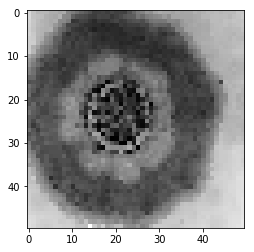

In [2]:
## Augmentates images(alters images slightly) to duplicate data so we can have equal amount of data in both folders

#import Augmentor
#p = Augmentor.Pipeline("C:/Users/hasin/Desktop/samples2/augmented")
#p.rotate(probability=0.4, max_left_rotation=15, max_right_rotation=15)
#p.zoom(probability=0.8, min_factor=0.9, max_factor=2.0)
#p.process()

IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [3]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|████████████████████████████████████████████████████████████████████████████████| 120/120 [00:08<00:00, 13.92it/s]


240


In [4]:
import random

random.shuffle(training_data)

In [5]:
XX = []
yy = []

In [6]:
for features, label in training_data:
    XX.append(features)
    yy.append(label)
    
XX = np.array(XX).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [7]:
import pickle

pickle_out = open("XX.pickle","wb")
with open("XX.pickle", "wb") as f:
    pickle.dump(XX, f)

#pickle.dump(XX, pickle_out)
    pickle_out.close()

pickle.out = open("yy.pickle", "wb")
with open("yy.pickle", "wb") as f:
    pickle.dump(yy, f)

#pickle.dump(yy, pickle_out)
    pickle_out.close()

In [8]:
pickle_in = open("XX.pickle", "rb")
XX = pickle.load(pickle_in)